**分析框架**

**一、导入数据**

In [1]:
#导入工具包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
mpl.rcParams['font.sans-serif']=['SimHei']  #设置字体样式以正常显示中文标签
mpl.rcParams['axes.unicode_minus']=False   #设置正常显示字符

In [2]:
#导入数据集
df = pd.read_excel(r'data\order2021.xlsx')

**二、探索数据**    

In [3]:
#查看导入数据的前10行
df.head(10)

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.42000,渠道1,微信公众号,2021-01-01 01:05:50,2021-01-01 01:06:17,否
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.53000,渠道1,APP,2021-01-01 01:36:17,2021-01-01 01:36:56,否
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.91000,渠道1,微信公众号,2021-01-01 12:01:04,2021-01-01 12:03:20,否
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.12000,渠道1,APP,2021-01-01 12:47:02,2021-01-01 12:47:21,否
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.04000,渠道1,APP,2021-01-01 12:50:23,2021-01-01 12:50:50,否
5,116,sys-2021-327004821,user-182341,PR000028,446.61,384.06000,渠道1,微信公众号,2021-01-01 13:46:42,2021-01-01 13:47:01,否
6,125,sys-2021-231859284,user-230748,PR000184,746.27,627.12000,渠道1,微信公众号,2021-01-01 13:57:55,2021-01-01 13:58:16,否
7,148,sys-2021-355060894,user-214122,PR000826,205.78,2044.27572,渠道1,APP,2021-01-01 14:44:49,2021-01-01 14:45:21,是
8,161,sys-2021-319358365,user-162284,PR000828,574.45,498.08000,渠道1,微信公众号,2021-01-01 15:29:20,2021-01-01 15:31:18,否
9,175,sys-2021-386137983,user-123538,PR000469,324.96,249.44000,渠道1,APP,2021-01-01 16:12:34,2021-01-01 16:12:53,否


In [4]:
#查看数据规模
df.shape

(104557, 11)

In [5]:
#查看数据整体信息
df.info()
#结果显示数据类型正常，渠道编号有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104557 entries, 0 to 104556
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   订单顺序编号  104557 non-null  int64         
 1   订单号     104557 non-null  object        
 2   用户名     104557 non-null  object        
 3   商品编号    104557 non-null  object        
 4   订单金额    104557 non-null  float64       
 5   付款金额    104557 non-null  float64       
 6   渠道编号    104549 non-null  object        
 7   平台类型    104557 non-null  object        
 8   下单时间    104557 non-null  datetime64[ns]
 9   付款时间    104557 non-null  datetime64[ns]
 10  是否退款    104557 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 8.8+ MB


In [6]:
#查看数据的描述性统计信息
#付款金额有异常值
df.describe()

,订单顺序编号,订单金额,付款金额
count,104557.000000,104557.000000,104557.000000
mean,52279.000000,1049.681521,1167.494225
std,30183.150385,1054.409968,2174.024855
min,1.000000,6.100000,-12.470000
25%,26140.000000,432.040000,383.660000
50%,52279.000000,679.320000,641.230000
75%,78418.000000,1248.280000,1252.630000
max,104557.000000,28465.250000,83270.053829


**三、数据清洗**

In [7]:
#对数据进行去文本空格处理
df.columns = df.columns.str.strip()
df.columns

Index(['订单顺序编号', '订单号', '用户名', '商品编号', '订单金额', '付款金额', '渠道编号', '平台类型', '下单时间',
       '付款时间', '是否退款'],
      dtype='object')

In [8]:
#查看数据集是否存在重复值
#两条记录中所有的数据都相等时duplicate才会判为重复值
df.duplicated().sum()

0

In [9]:
#查看数据缺失值
df.isnull().sum()
#结果显示，渠道编号有8个缺失值
#原数据集比较庞大，且缺失值不是分析目标的关键特征，所以选择删掉

订单顺序编号    0
订单号       0
用户名       0
商品编号      0
订单金额      0
付款金额      0
渠道编号      8
平台类型      0
下单时间      0
付款时间      0
是否退款      0
dtype: int64

In [10]:
#删除渠道编号缺失的数据
#检查是否删除成功
df.dropna(inplace=True)
df.isnull().sum()

订单顺序编号    0
订单号       0
用户名       0
商品编号      0
订单金额      0
付款金额      0
渠道编号      0
平台类型      0
下单时间      0
付款时间      0
是否退款      0
dtype: int64

In [11]:
#异常值处理
#查找付款金额小于0的数据
abnormal=df[np.where(df['付款金额'] < 0,True,False)]
abnormal

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
23860,66573,sys-2021-288096069,user-186966,PR000511,136.99,-12.34,渠道5,APP,2021-09-08 21:32:54,2021-09-08 21:33:10,否
24753,96939,sys-2021-323229098,user-198083,PR000548,126.92,-11.13,渠道5,APP,2021-12-10 14:24:13,2021-12-10 14:24:26,是
29600,31393,sys-2021-296608442,user-212991,PR000385,112.91,-10.17,渠道7,APP,2021-05-24 08:52:04,2021-05-24 08:52:23,否
35486,999,sys-2021-324068352,user-112962,PR000602,364.08,-12.47,渠道8,微信公众号,2021-01-04 10:47:05,2021-01-04 10:47:05,否
62781,72266,sys-2021-316685479,user-189901,PR000554,2287.74,-10.98,渠道11,微信公众号,2021-09-28 11:57:46,2021-09-28 11:57:46,否
71784,18684,sys-2021-311194385,user-110299,PR000797,118.06,-10.08,渠道13,web网站,2021-04-06 11:20:43,2021-04-06 11:21:31,否


In [12]:
#提取异常值的索引
abindex = abnormal.index
abindex

Int64Index([23860, 24753, 29600, 35486, 62781, 71784], dtype='int64')

In [13]:
#删除付款金额小于0的数据
df.drop(abindex,inplace=True)

In [14]:
#查看是否删除成功
df.shape

(104543, 11)

In [15]:
#通过可视化来看数据的分布情况判断是否异常

偏度 3.1440133730424478
峰度 21.80010550560282


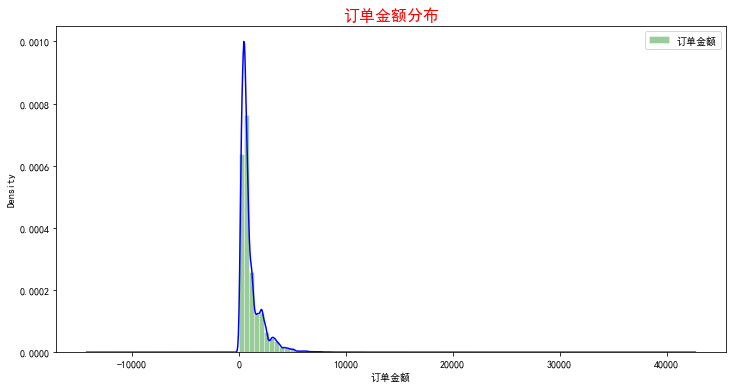

In [16]:
#用直方图和核密度看下‘订单金额’的数据分布
plt.figure(figsize=(12,6))
plt.hist(df['订单金额'],bins=60,
         color='g',label='订单金额',
         histtype='bar',density=True,
         edgecolor = 'white',alpha=0.4)
plt.title('订单金额分布',fontdict={'fontsize':16,'color':'r'})
plt.xlabel('订单金额')
plt.ylabel('密度')
plt.legend(loc = 'best')

data1=df['订单金额']
data1.plot(kind='kde',color='b')

print('偏度',data1.skew())
print('峰度',data1.kurtosis())

偏度 12.431755865938815
峰度 248.73275784431132


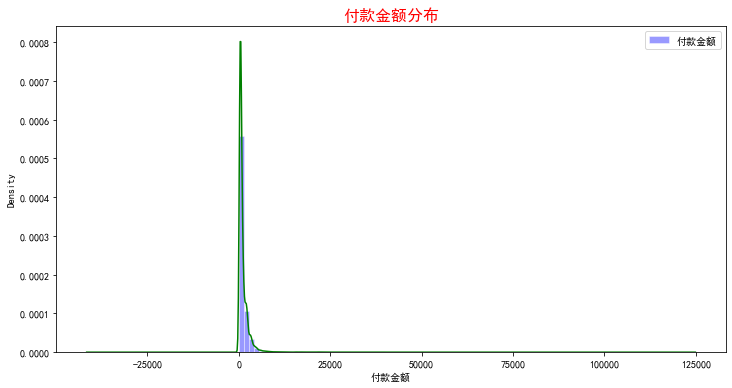

In [17]:
#用直方图和核密度看下‘付款金额’的数据分布
plt.figure(figsize=(12,6))
plt.hist(df['付款金额'],bins=60,
         color='b',label='付款金额',
         histtype='bar',density=True,
         edgecolor = 'white',alpha=0.4)
plt.title('付款金额分布',fontdict={'fontsize':16,'color':'r'})
plt.xlabel('付款金额')
plt.ylabel('密度')
plt.legend(loc = 'best')

data2=df['付款金额']
data2.plot(kind='kde',color='g')

print('偏度',data2.skew())
print('峰度',data2.kurtosis())

In [18]:
#运行结果得出：
#从建模角度看，订单金额’和‘付款金额’都是呈右偏分布，小数据多，存在较小的离群值，数据差距较大，属于异常值
#但从业务角度看，这样的数据分布符合业务逻辑，所以不判定为异常值，因此不做处理

**四、用户消费行为分析**

In [19]:
#退款情况
df.groupby(['是否退款']).agg({'用户名':['count']})

,用户名
,count
是否退款,
否,90763
是,13780


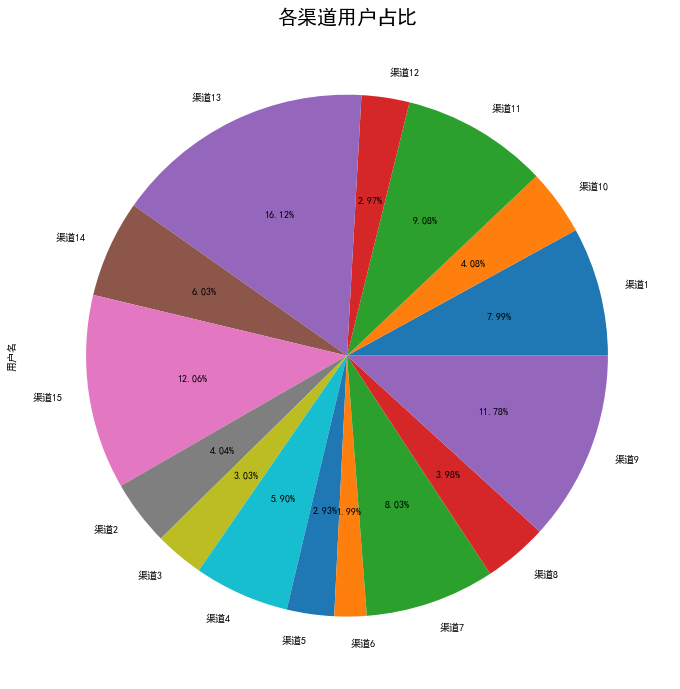

In [20]:
#客户渠道分布情况
#可以看出用户来源主要集中在渠道13、渠道15、渠道9，运营推广可重点关注这三个渠道
df_p = df.groupby('渠道编号')['用户名'].count()
df_p.plot.pie(figsize=(12,12),labels=df_p.index,autopct='%0.2f%%')
plt.title('各渠道用户占比',size=20)
plt.show()            

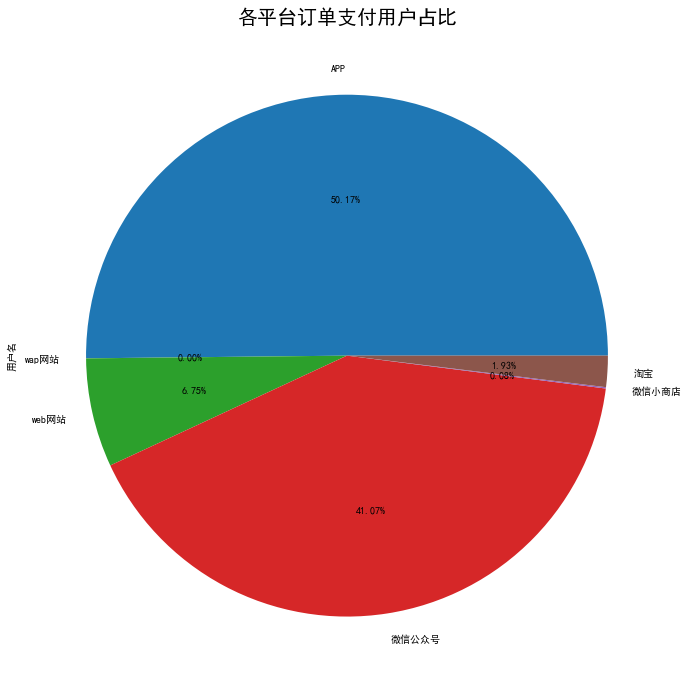

In [21]:
#平台订单支付情况
#订单支付主要是来自于APP和微信公众号,应该重点在这两个平台推广
df_p = df.groupby('平台类型')['用户名'].count()
df_p.plot.pie(figsize=(12,12),labels=df_p.index,autopct='%0.2f%%')
plt.title('各平台订单支付用户占比',size=20)
plt.show()

**五、RFM模型构建**

In [22]:
#筛选没有退款的订单
df1 = df[np.where(df['是否退款']=='否',True,False)]
df1

,订单顺序编号,订单号,用户名,商品编号,订单金额,付款金额,渠道编号,平台类型,下单时间,付款时间,是否退款
0,8,sys-2021-306447069,user-104863,PR000499,499.41,480.42,渠道1,微信公众号,2021-01-01 01:05:50,2021-01-01 01:06:17,否
1,11,sys-2021-417411381,user-181957,PR000483,279.53,279.53,渠道1,APP,2021-01-01 01:36:17,2021-01-01 01:36:56,否
2,61,sys-2021-313655292,user-282453,PR000154,1658.95,1653.91,渠道1,微信公众号,2021-01-01 12:01:04,2021-01-01 12:03:20,否
3,78,sys-2021-311884106,user-167776,PR000215,343.25,337.12,渠道1,APP,2021-01-01 12:47:02,2021-01-01 12:47:21,否
4,81,sys-2021-375273222,user-138024,PR000515,329.04,329.04,渠道1,APP,2021-01-01 12:50:23,2021-01-01 12:50:50,否
...,...,...,...,...,...,...,...,...,...,...,...
104544,104515,sys-2020-247689274,user-254850,PR000239,251.83,179.56,渠道15,淘宝,2020-01-01 21:21:09,2021-01-01 21:21:55,否
104545,104527,sys-2020-250518601,user-291340,PR000950,1485.02,1407.60,渠道15,微信公众号,2020-01-01 21:57:45,2021-01-01 21:57:58,否
104546,104529,sys-2020-260463573,user-280181,PR000564,882.63,732.37,渠道15,APP,2020-01-01 22:05:34,2021-01-01 22:05:40,否
104547,104549,sys-2020-310196315,user-235227,PR000885,280.39,256.74,渠道15,微信公众号,2020-01-01 23:23:49,2021-01-01 23:24:03,否


In [23]:
#构建子表
df2=df1.loc[:,['订单号','用户名','付款金额','付款时间']]
df2.head()

,订单号,用户名,付款金额,付款时间
0,sys-2021-306447069,user-104863,480.42,2021-01-01 01:06:17
1,sys-2021-417411381,user-181957,279.53,2021-01-01 01:36:56
2,sys-2021-313655292,user-282453,1653.91,2021-01-01 12:03:20
3,sys-2021-311884106,user-167776,337.12,2021-01-01 12:47:21
4,sys-2021-375273222,user-138024,329.04,2021-01-01 12:50:50


In [24]:
#将交易日期处理为日期数据类型
df2['付款时间'] = pd.to_datetime(df2['付款时间'],format='%Y%m%d')
#假设2022-01-01是计算当天,求交易日期到计算当天的距离天数
df2['至今天数'] = pd.to_datetime('2022-01-01') - df2['付款时间']
#从时间距离中获取天数
df2['至今天数'] = df2['至今天数'].dt.days

In [25]:
df2

,订单号,用户名,付款金额,付款时间,至今天数
0,sys-2021-306447069,user-104863,480.42,2021-01-01 01:06:17,364
1,sys-2021-417411381,user-181957,279.53,2021-01-01 01:36:56,364
2,sys-2021-313655292,user-282453,1653.91,2021-01-01 12:03:20,364
3,sys-2021-311884106,user-167776,337.12,2021-01-01 12:47:21,364
4,sys-2021-375273222,user-138024,329.04,2021-01-01 12:50:50,364
...,...,...,...,...,...
104544,sys-2020-247689274,user-254850,179.56,2021-01-01 21:21:55,364
104545,sys-2020-250518601,user-291340,1407.60,2021-01-01 21:57:58,364
104546,sys-2020-260463573,user-280181,732.37,2021-01-01 22:05:40,364
104547,sys-2020-310196315,user-235227,256.74,2021-01-01 23:24:03,364


In [26]:
#构建R：统计每个客户距离制定日期多久没有消费了，找出最小的最近消费距离
R = df2.groupby(by=['用户名'],as_index=False)['至今天数'].agg('min')
R

,用户名,至今天数
0,user-100000,79
1,user-100003,221
2,user-100006,47
3,user-100007,351
4,user-100008,45
...,...,...
71248,user-299980,74
71249,user-299983,4
71250,user-299989,50
71251,user-299992,364


In [27]:
#构建F：统计每个客户交易的总次数，即对订单号计数
F = df2.groupby(by=['用户名'],as_index=False)['订单号'].agg('count')
F

,用户名,订单号
0,user-100000,1
1,user-100003,1
2,user-100006,1
3,user-100007,1
4,user-100008,1
...,...,...
71248,user-299980,2
71249,user-299983,1
71250,user-299989,2
71251,user-299992,1


In [28]:
#构建M：统计每个客户交易的总额，即对付款金额求和
M = df2.groupby(by=['用户名'],as_index=False)['付款金额'].agg('sum')
M

,用户名,付款金额
0,user-100000,1770.81
1,user-100003,511.59
2,user-100006,443.55
3,user-100007,2162.14
4,user-100008,4879.94
...,...,...
71248,user-299980,719.77
71249,user-299983,706.80
71250,user-299989,1637.47
71251,user-299992,440.17


In [29]:
#将R、F、M三个数据框关联，merge默认内连接，可省略，两表on条件的关联列名均为‘用户名’，同样可省略
RFMData = R.merge(F).merge(M)
#修改列名
RFMData.columns = ['用户名','R','F','M']
RFMData

,用户名,R,F,M
0,user-100000,79,1,1770.81
1,user-100003,221,1,511.59
2,user-100006,47,1,443.55
3,user-100007,351,1,2162.14
4,user-100008,45,1,4879.94
...,...,...,...,...
71248,user-299980,74,2,719.77
71249,user-299983,4,1,706.80
71250,user-299989,50,2,1637.47
71251,user-299992,364,1,440.17


In [30]:
#对R、F、M分组打分
#本例将R、F、M三列分别按照各自的平均值划分为2个组，并赋值1分、2分。

#R分值（R_S）：定义为距离指定日期越近，R_S越大，R>=平均值，R_S为1，R<平均值，R_S为2。

#F分值（F_S）：定义为交易频率越高，F_S越大，F<=平均值，F_S为1，F>平均值，F_S为2。

#M分值（M_S）：定义为交易金额越高，M_S越大，M<=平均值，M_S为1，M>平均值，M_S为2。


In [31]:
#判断R列是否大于等于R列的平均值，将符合条件R_S列的值赋值为1,小于平均值赋值为2
RFMData['R_S']=np.where(RFMData['R']>=RFMData['R'].mean(),1,2)
#同R_S赋值方法，对F_S、M_S进行赋值，但与R相反，F、M均为越大越好
RFMData['F_S']=np.where(RFMData['F']>=RFMData['F'].mean(),2,1)
RFMData['M_S']=np.where(RFMData['M']>=RFMData['M'].mean(),2,1)
RFMData

,用户名,R,F,M,R_S,F_S,M_S
0,user-100000,79,1,1770.81,2,1,2
1,user-100003,221,1,511.59,1,1,1
2,user-100006,47,1,443.55,2,1,1
3,user-100007,351,1,2162.14,1,1,2
4,user-100008,45,1,4879.94,2,1,2
...,...,...,...,...,...,...,...
71248,user-299980,74,2,719.77,2,2,1
71249,user-299983,4,1,706.80,2,1,1
71250,user-299989,50,2,1637.47,2,2,2
71251,user-299992,364,1,440.17,1,1,1


In [32]:
rfmData = RFMData.iloc[:,[0,-3,-2,-1]]
rfmData

,用户名,R_S,F_S,M_S
0,user-100000,2,1,2
1,user-100003,1,1,1
2,user-100006,2,1,1
3,user-100007,1,1,2
4,user-100008,2,1,2
...,...,...,...,...
71248,user-299980,2,2,1
71249,user-299983,2,1,1
71250,user-299989,2,2,2
71251,user-299992,1,1,1


In [33]:
#计算RFM综合分值
rfmData['RFM']=rfmData['R_S'].map(str)+rfmData['F_S'].map(str)+rfmData['M_S'].map(str)
rfmData.head()

,用户名,R_S,F_S,M_S,RFM
0,user-100000,2,1,2,212
1,user-100003,1,1,1,111
2,user-100006,2,1,1,211
3,user-100007,1,1,2,112
4,user-100008,2,1,2,212


In [34]:
#定义RFM综合分值与客户类型的对应关系表
CustomerType=pd.DataFrame(data={'RFM':['111','112','121','122','211','212','221','222'],'Type':['一般挽留客户','重要挽留客户','一般保持客户','重要保持客户','一般发展客户','重要发展客户','一般价值客户','重要价值客户']},index=None)
CustomerType

,RFM,Type
0,111,一般挽留客户
1,112,重要挽留客户
2,121,一般保持客户
3,122,重要保持客户
4,211,一般发展客户
5,212,重要发展客户
6,221,一般价值客户
7,222,重要价值客户


In [35]:
#将RFMData与RFM综合分值客户类型的对应关系表合并为一个数据框
#CustomerType['RFM'] = rfmData['RFM'].apply(int)
RFMData2=pd.merge(rfmData, CustomerType, on='RFM')
RFMData2

,用户名,R_S,F_S,M_S,RFM,Type
0,user-100000,2,1,2,212,重要发展客户
1,user-100008,2,1,2,212,重要发展客户
2,user-100030,2,1,2,212,重要发展客户
3,user-100034,2,1,2,212,重要发展客户
4,user-100068,2,1,2,212,重要发展客户
...,...,...,...,...,...,...
71248,user-298882,1,2,2,122,重要保持客户
71249,user-298930,1,2,2,122,重要保持客户
71250,user-299483,1,2,2,122,重要保持客户
71251,user-299569,1,2,2,122,重要保持客户


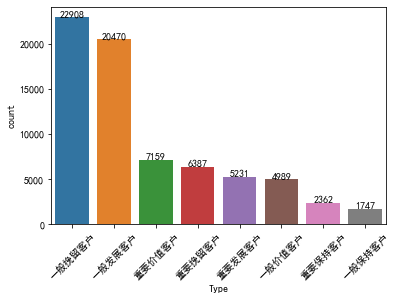

In [36]:
#RMF模型可视化
import seaborn as sns
v = RFMData2['Type'].value_counts()
plt.xticks(rotation=45)
ax = sns.countplot(x=RFMData2['Type'],order=v.index)
#在图像上绘制数值
for x,y in enumerate(v):
    text = ax.text(x,y,y)
    #文本数据居中对齐
    text.set_ha('center')

**小结：**  

RFM模型只提供了R、F、M三个维度，对于每个维度上的划分标准没有绝对的标准  

划分标准主要有以下四类：  

1.均值  

2.中位数  

3.对R、F、M赋予权重：可以凭借业务经验，也可以用层次分析法赋予权重  

RFM模型的划分标准具有一定主观性，为了相对客观的对用户分层，可以采用聚类算法来实现

**六、K-Means聚类算法**

In [37]:
#获取R,F,M数据
dataA = RFMData.iloc[:,:-3]
dataB = dataA.set_index('用户名')
dataB.head()

,R,F,M
用户名,,,
user-100000,79,1,1770.81
user-100003,221,1,511.59
user-100006,47,1,443.55
user-100007,351,1,2162.14
user-100008,45,1,4879.94


In [38]:
#由于RFM量纲不同，可能导致聚类结果不好，所以我们先进行数据标准化
from sklearn.preprocessing import StandardScaler
#采用StandardScaler方法对数据规范化：均值为0，方差为1的正态分布
g = StandardScaler()
stand_data = g.fit_transform(dataB)
stand_data = pd.DataFrame(stand_data,columns=dataB.columns,index=dataB.index)
stand_data.head()

,R,F,M
用户名,,,
user-100000,-0.701066,-0.4958,0.110680
user-100003,0.717193,-0.4958,-0.380447
user-100006,-1.020674,-0.4958,-0.406984
user-100007,2.015600,-0.4958,0.263309
user-100008,-1.040650,-0.4958,1.323319


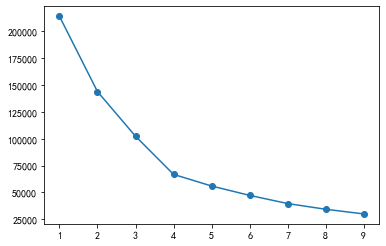

In [39]:
#根据最小的SSE原则确定簇数量，选择最佳的K值，即客户的类别数量
from sklearn.cluster import KMeans
#定义SSE列表，用来存放不同K值下的SSE
SSE = []
#定义候选K值
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,random_state = 12)
    kmeans.fit(stand_data)
    SSE.append(kmeans.inertia_)
#使用手肘法看K值
plt.plot(range(1,10),SSE,marker = 'o')
plt.show()

In [40]:
#根据上图显示，当k为4或5时，效果较好

In [41]:
#使用轮廓系数看K值:轮廓系数是描述簇内外差异的关键指标,越接近1，聚类效果越好
from sklearn.metrics import silhouette_score
kc = KMeans(n_clusters=4,random_state=12)
kc.fit(stand_data)
silhouette_score(stand_data,kc.labels_)

0.4791988563405966

In [42]:
kc = KMeans(n_clusters=5,random_state=12)
kc.fit(stand_data)
silhouette_score(stand_data,kc.labels_)

0.4949164869307785

In [43]:
#由手肘法和轮廓系数得出K值分成5类，聚类效果最好

In [44]:
#执行聚类
kmeans = KMeans(n_clusters=5,random_state=12)
result = kmeans.fit(stand_data)
#获取每个样本所属的簇，标签的数值对应所属簇的索引
print('标签:',kmeans.labels_)
#获取SSE（簇惯性）
print('SSE:',kmeans.inertia_)
#获取迭代次数
print('迭代次数:',kmeans.n_iter_)
#聚类的分值，分值越大，效果越好,直接取SSE的相反数
print('分值:',kmeans.score(stand_data))

标签: [1 0 1 ... 3 0 0]
SSE: 55988.218541348695
迭代次数: 7
分值: -55988.2185413487


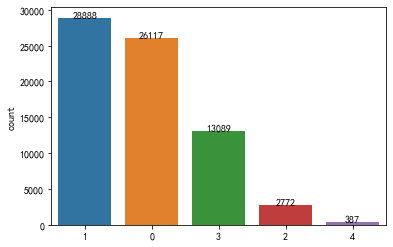

In [45]:
#统计每个类别群体的数量
qt = pd.Series(kmeans.labels_).value_counts()
ax = sns.countplot(x=kmeans.labels_,order=qt.index)
#在图像上绘制数值
for x,y in enumerate(qt):
    text = ax.text(x,y,y)
    text.set_ha('center')

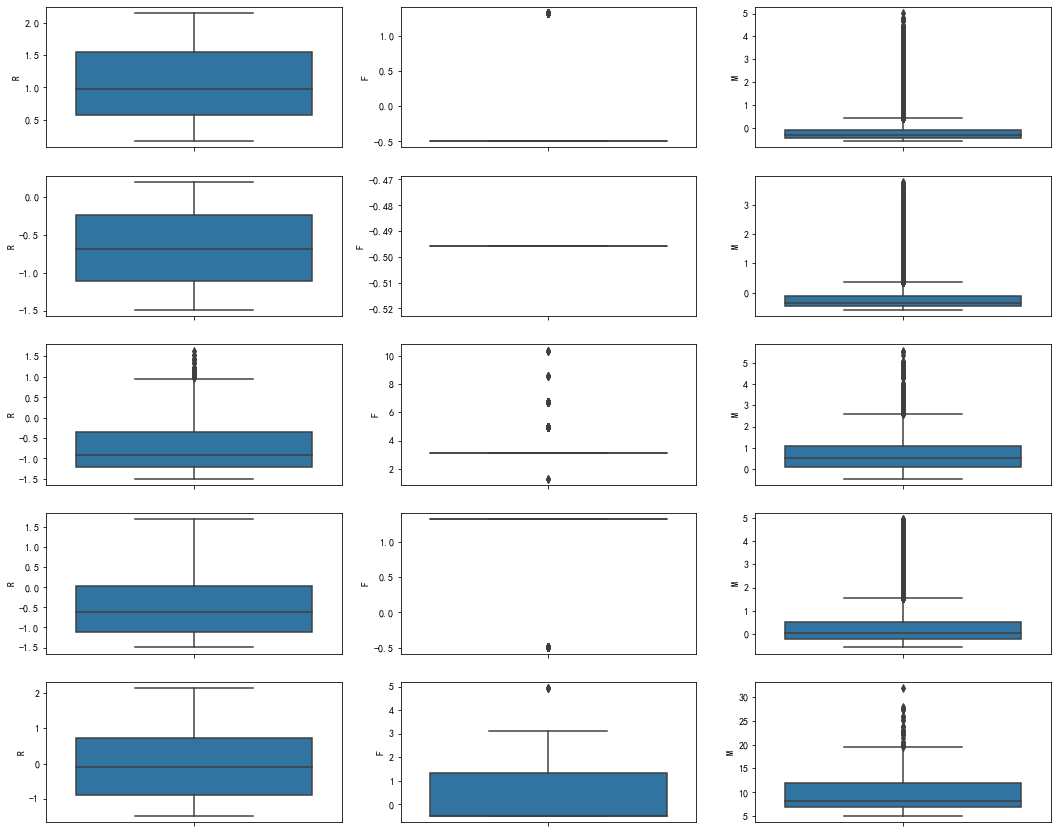

In [46]:
#客户群体分析
fig,ax = plt.subplots(5,3)
fig.set_size_inches(18,15)
for i in range(5):
    #获取第i个客户群的数据
    de = stand_data[kmeans.labels_==i]
    sns.boxplot(y='R',data=de,ax=ax[i][0])
    sns.boxplot(y='F',data=de,ax=ax[i][1])
    sns.boxplot(y='M',data=de,ax=ax[i][2])

**七、结论与建议**  

1类客户消费特点：R低，F低，M低，属于一般挽留客户，这类客户数量最多,不用耗费过多精力，在促销时发送通知，给予一定的优惠券激活   

2类客户消费特点：R高，F低，M低，属于一般发展客户，这类客户数量排第2，可能是新用户，说明2021年拉新效果还不错。需要频繁发放优惠券刺激消费以及通过大数据分析个性化营销的方式提升其消费频次和金额。  

3类客户消费特点：R低，F高，M低，属于一般保持客户，贡献不大，偶尔赠送优惠券，发送打折信息   

4类客户消费特点：R高，F高，M高，属于重要价值客户，这类客户属于SVIP客户，需要重点关注，倾斜更多资源，长期联络，定期回访，一对一客服服务，生日、节日问候，赠送礼品  

5类客户消费特点：R低，F高，M高，属于重要保持客户，需要通过APP消息推送，发送打折信息，站外广告营销等方式唤醒召回